# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
import kagglehub

In [2]:
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

100%|██████████| 262M/262M [04:19<00:00, 1.06MB/s] 

Extracting model files...


Path to dataset files: C:\Users\youss\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10


# Reading the DataSet


In [4]:
df = pd.read_csv(r"C:\Users\youss\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10\vehicles.csv")
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [8]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


# Data Cleaning

In [9]:
df.shape

(426880, 26)

In [10]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [11]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [12]:

df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

# Data Visualization
# 1. What is the average price of used cars by manufacturer?

In [14]:
avg_price_by_manufacturer = df.groupby('manufacturer').price.mean()
print(avg_price_by_manufacturer)

manufacturer
acura               19842.869522
alfa-romeo          28237.348941
aston-martin        53494.541667
audi                23574.849993
bmw                 26740.261446
buick               36784.954736
cadillac            19439.520926
chevrolet          115676.101645
chrysler            10442.946609
datsun              15149.666667
dodge               15003.200554
ferrari            107438.736842
fiat                11890.517677
ford                36411.718025
gmc                 30405.877152
harley-davidson     12129.790850
honda               10751.363722
hyundai             10719.659412
infiniti            19561.849229
jaguar              26549.176259
jeep               150717.819659
kia                 11083.324820
land rover           7911.095238
lexus               19206.152683
lincoln             19802.274645
mazda               12345.607702
mercedes-benz      531710.557333
mercury              5482.536318
mini                14163.474747
mitsubishi          13743.0707

# 2.What is the average price of used cars by year?

In [15]:
avg_price_by_year = df.groupby('year').price.mean()
print(avg_price_by_year)

year
1900.0    3.694167e+03
1901.0    1.699667e+03
1902.0    1.666666e+06
1903.0    0.000000e+00
1905.0    3.990000e+03
              ...     
2018.0    2.636861e+04
2019.0    3.297553e+04
2020.0    9.189771e+04
2021.0    1.338055e+06
2022.0    2.736705e+04
Name: price, Length: 114, dtype: float64


# 3. What is the average price of used cars by model?

In [16]:
avg_price_by_model = df.groupby('model').price.mean()
print(avg_price_by_model)

model
"t"                                                                                      27000.0
$362.47, $1000 down, oac, 2.9%apr $362.47,luxury low miles $1000 down, only 40k miles    24900.0
%                                                                                         1000.0
& altima                                                                                  3045.0
'50 Business Coupe                                                                       10000.0
                                                                                          ...   
♦ALL TADES WELCOME!♦                                                                       500.0
♿                                                                                        10999.0
♿ vmi                                                                                    10997.0
𝓜𝓮𝓻𝓬𝓮𝓭𝓮𝓼 𝓫𝓮𝓷𝔃 𝓶𝓵 350                                                                      3900.0
🔥GMC Sierra 1500 SLE🔥 4X

# 4. What is the average price of used cars by condition?

In [17]:
avg_price_by_condition = df.groupby('condition').price.mean()
print(avg_price_by_condition)

condition
excellent     51346.825953
fair         761090.005614
good          32545.203102
like new      36402.041978
new           23657.266667
salvage        3605.534110
Name: price, dtype: float64


# 5. What is the average price of used cars by transmission?

In [18]:
avg_price_by_transmission = df.groupby('transmission').price.mean()
print(avg_price_by_transmission)

transmission
automatic     74881.003396
manual       198416.336452
other         30003.788376
Name: price, dtype: float64


# 6. what is the Most Common Car Models

In [20]:
common_car_models = df['model'].value_counts().head(10)
print(common_car_models)

model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
accord            2969
wrangler          2848
civic             2799
altima            2779
escape            2746
Name: count, dtype: int64


# 7. What is the Most Common Car Manufacturers

In [22]:
common_car_manufacturers = df['manufacturer'].value_counts().head(10)
print(common_car_manufacturers)

manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
jeep         19014
ram          18342
gmc          16785
bmw          14699
dodge        13707
Name: count, dtype: int64


# 8. What is the Most Common Car Conditions

In [23]:
common_car_conditions = df['condition'].value_counts().head(10)
print(common_car_conditions)

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


# 9. What is the Most Common Car Transmissions

In [24]:
common_car_transmissions = df['transmission'].value_counts().head(10)
print(common_car_transmissions)

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64


# 10. What is the Most Common Car Years

In [25]:
common_car_years = df['year'].value_counts().head(10)
print(common_car_years)

year
2017.0    36420
2018.0    36369
2015.0    31538
2013.0    30794
2016.0    30434
2014.0    30283
2019.0    25375
2012.0    23898
2011.0    20341
2020.0    19298
Name: count, dtype: int64


# 11. What is Most Common Car Types

In [29]:
common_car_types = df['type'].value_counts().head(10)
print(common_car_types)

type
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
Name: count, dtype: int64


# 12. What is the Most Common Car Fuel Types

In [31]:
common_car_fuel_types = df['fuel'].value_counts().head(10)
print(common_car_fuel_types)

fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64


# 13. What is the Most Common Car Cylinders

In [33]:
common_car_cylinders = df['cylinders'].value_counts().head(10)
print(common_car_cylinders)

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64


# 14. How does mileage (odometer reading) affect the car price?

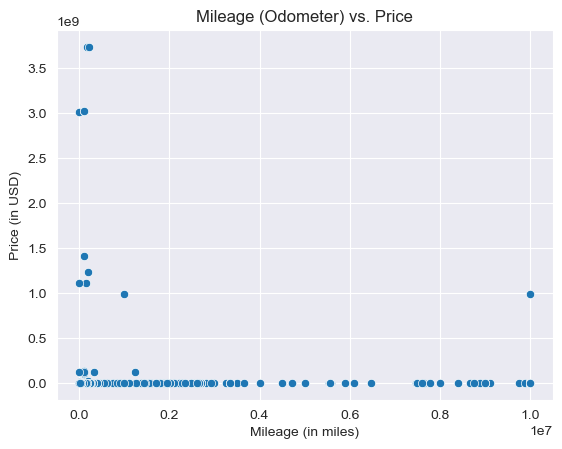

In [39]:
sns.scatterplot(data=df, x='odometer', y='price')
plt.title('Mileage (Odometer) vs. Price')
plt.xlabel('Mileage (in miles)')
plt.ylabel('Price (in USD)')
plt.show()

# 15. How do the car prices vary by posting date (seasonality)

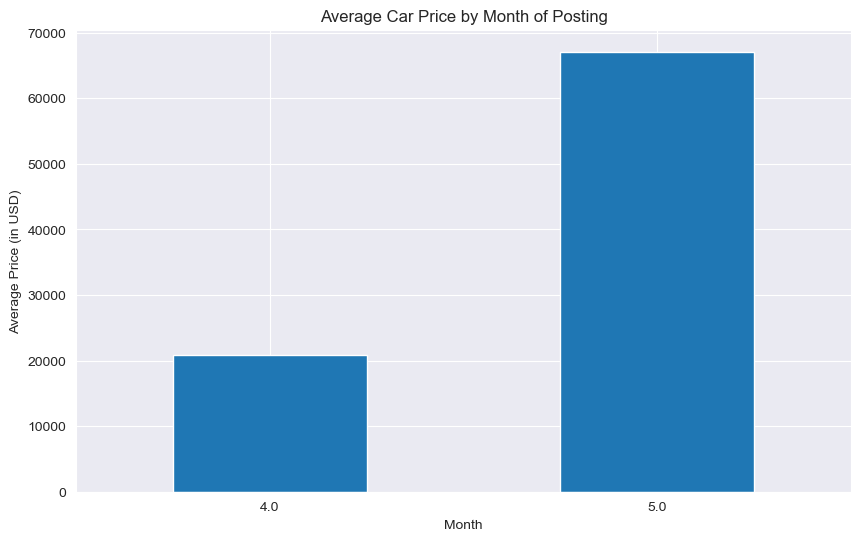

In [41]:
# Price Distribution by Posting Date

df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')

# Extract month from posting date to analyze seasonality
df['month'] = df['posting_date'].dt.month
avg_price_by_month = df.groupby('month')['price'].mean()

# Plot seasonality in prices
plt.figure(figsize=(10, 6))
avg_price_by_month.plot(kind='bar')
plt.title('Average Car Price by Month of Posting')
plt.xlabel('Month')
plt.ylabel('Average Price (in USD)')
plt.xticks(rotation=0)
plt.show()

# 16. Which counties have the highest number of car listings?

In [44]:
avg_price_by_transmission = df.groupby('transmission')['price'].mean().sort_values(ascending=False)
print(avg_price_by_transmission)

transmission
manual       198416.336452
automatic     74881.003396
other         30003.788376
Name: price, dtype: float64


# 17.What is the distribution of car prices by fuel type (e.g., gas, diesel, electric)?

In [ ]:
avg_price_by_fuel = df.groupby('fuel')['price'].mean().sort_values(ascending=False)
print(avg_price_by_fuel)